In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("Set2")



In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [39]:
df = pd.read_csv("E:\College_Files\Finding Psychological Instability\Finding psychological instability\Dataset-Mental-Disorders.csv")
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patient-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patient-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patient-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patient-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patient-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [5]:
df.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patient-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [6]:
df['Expert Diagnose'].value_counts()

Expert Diagnose
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

In [7]:
df['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64

In [8]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace('YES ', "YES")

In [9]:
df['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64

In [10]:
df['Sadness'].value_counts()

Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64

In [11]:
df['Euphoric'].value_counts()

Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: count, dtype: int64

In [12]:
df['Sexual Activity'].value_counts()

Sexual Activity
5 From 10    22
4 From 10    20
3 From 10    17
6 From 10    15
2 From 10    15
7 From 10    14
8 From 10    11
1 From 10     4
9 From 10     2
Name: count, dtype: int64

In [13]:
df['Optimisim'].value_counts()

Optimisim
6 From 10    21
5 From 10    20
4 From 10    19
2 From 10    18
3 From 10    18
7 From 10     8
8 From 10     8
1 From 10     6
9 From 10     2
Name: count, dtype: int64

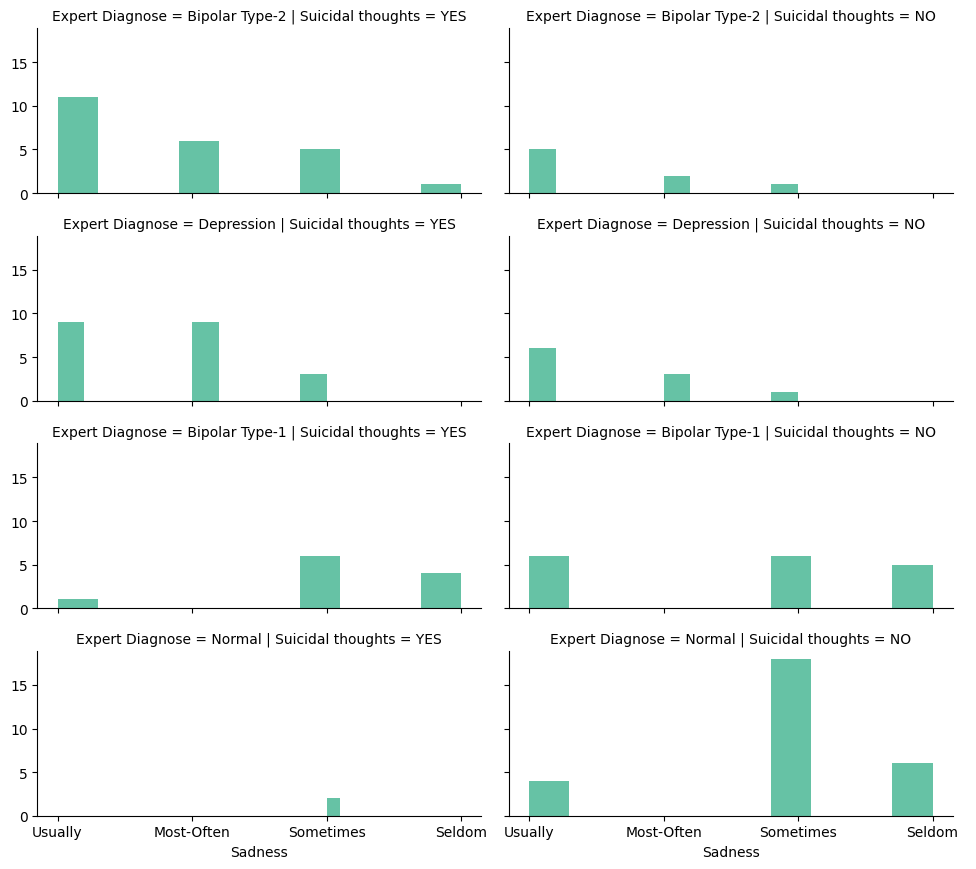

In [14]:
grid = sns.FacetGrid(df, col='Suicidal thoughts', row='Expert Diagnose', height=2.2, aspect=2.2)
grid.map(plt.hist, 'Sadness')
grid.add_legend()

In [15]:
df = df.drop('Patient Number', axis=1)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [16]:
df['Expert Diagnose'] = df['Expert Diagnose'].map({'Normal': 0, 
                                                   'Bipolar Type-1': 1,
                                                  'Bipolar Type-2': 2,
                                                  'Depression': 3}).astype(int)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [17]:
yes_no_cols = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
for col in yes_no_cols:
    df[col] = df[col].map({'YES': 1, 'NO': 0}).astype(int)

In [18]:
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [19]:
X = df.drop(columns=['Expert Diagnose'],axis=1)
y = df['Expert Diagnose']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
X_train.shape

(96, 17)

In [22]:
y_train.shape

(96,)

In [23]:
X_test.shape

(24, 17)

In [24]:
y_test.shape

(24,)

In [25]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)


LogisticRegression()

In [27]:
y_pred_logreg = logreg.predict(X_test_encoded)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [28]:
accuracy_logreg

0.9166666666666666

In [29]:
classification_report(y_test, y_pred_logreg)

'              precision    recall  f1-score   support\n\n           0       1.00      0.86      0.92         7\n           1       1.00      0.75      0.86         4\n           2       0.83      1.00      0.91         5\n           3       0.89      1.00      0.94         8\n\n    accuracy                           0.92        24\n   macro avg       0.93      0.90      0.91        24\nweighted avg       0.93      0.92      0.92        24\n'

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [31]:
y_pred_rf = rf.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [41]:
accuracy_rf

0.875

In [33]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86         7\n           1       1.00      0.50      0.67         4\n           2       0.83      1.00      0.91         5\n           3       0.89      1.00      0.94         8\n\n    accuracy                           0.88        24\n   macro avg       0.89      0.84      0.84        24\nweighted avg       0.89      0.88      0.86        24\n'

In [34]:
svm = SVC()
svm.fit(X_train_encoded, y_train)

SVC()

In [35]:
y_pred_svm = svm.predict(X_test_encoded)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [36]:
accuracy_svm

0.8333333333333334

In [37]:
classification_report(y_test, y_pred_svm)

'              precision    recall  f1-score   support\n\n           0       1.00      0.57      0.73         7\n           1       0.75      0.75      0.75         4\n           2       0.83      1.00      0.91         5\n           3       0.80      1.00      0.89         8\n\n    accuracy                           0.83        24\n   macro avg       0.85      0.83      0.82        24\nweighted avg       0.86      0.83      0.82        24\n'